In [6]:
import sympy as sp
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from macrosim.SimEngine import SimEngine

In [3]:
with open('../temp_eq.pkl', 'rb') as f:
    eq = pickle.load(f)

engine = SimEngine(
    eq=eq,
    init_params={
        'NETEXP': (-500, lambda x: x),
        'CIVPART': (70, lambda x: x),
        'RWAGE': (400, lambda x: x * 1.01),
        'POPGROWTH': (1, lambda x: x * 1.02),
        'CPI': (4, lambda x: x)
    }
)

In [4]:
for _ in range(100):
    next(engine._simulate())
engine.get_history()

,NETEXP,CIVPART,RWAGE,POPGROWTH,CPI,output
step,,,,,,
0,-506.208927,69.758037,410.541654,1.058837,3.976585,14391.983843
1,-503.245871,72.512107,422.602435,1.067338,4.030523,14849.774651
2,-497.415545,71.667831,429.410369,1.036611,3.856715,12963.331540
3,-490.423282,69.853146,437.111734,1.033341,3.720544,13850.991234
4,-508.392988,69.458866,442.228165,1.016465,3.669909,15515.587941
...,...,...,...,...,...,...
95,-447.581656,84.875114,856.400500,8.935510,3.544849,6720.095140
96,-446.150317,82.847574,830.226528,9.160581,3.477821,5103.804556
97,-430.286843,81.508399,815.856065,9.737900,3.554475,5631.970027


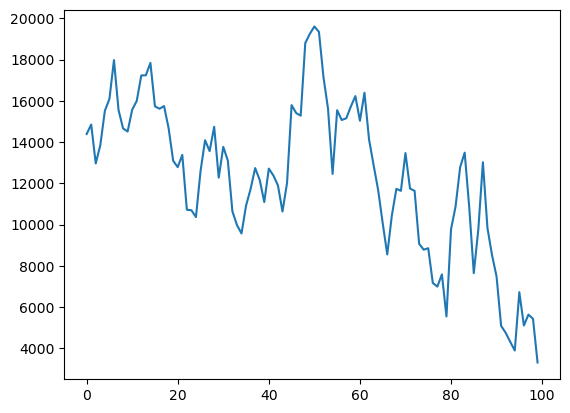

In [7]:
plt.plot(engine.get_history()['output'])